<a href="https://colab.research.google.com/github/Rorando111/cpe019/blob/main/Celeste_Hands_on_Activity_11_1_%7C_Prepare_a_Dataset_for_LSTM_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Hands-on Activity 11.1 | Prepare a Dataset for LSTM and CNN** |
**Name** | Celeste, Rolando
**Section** | CPE32S9
**Date Performed**: | 05/01/2024
**Date Submitted**: | 05/11/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

**Objective(s):**

This activity aims to prepare a dataset for LSTM and CNN time series forecasting.

**Intended Learning Outcomes (ILOs):**

1. Demonstrate how to prepare a dataset suitable for LSTM and CNN.

**Resources/Files:**
* Jupyter Notebook
* IBM_2006-01-01_to_2018-01-01.csv

**Scenario:**
Given an IBM stocks dataset between 2006 to 2018. You are task to do the following:

* Load the dataset and examine it.
* Check for missing values.
* Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)

**Sample image:**

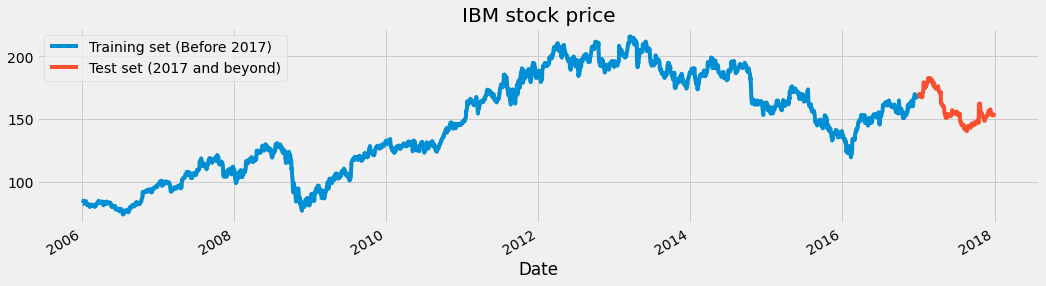

* Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.
* LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements.
* Reshape the X_train for efficient modeling

### Load Dataset and Examine

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [ ]:
# Examine the dataset
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


### **Check for missing values.**

In [ ]:
df.isna().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [ ]:
df = df.drop('Name', axis=1)

I dropped the column 'Name' because it contains the string "IBM" and poses no significance in preparing in this dataset and will only cause errors

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200
2006-01-04,82.20,82.50,81.33,81.95,9840600
2006-01-05,81.40,82.90,81.00,82.50,7213500
2006-01-06,83.95,85.03,83.41,84.95,8197400
2006-01-09,84.10,84.25,83.38,83.73,6858200


### **Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)**

In [ ]:
# Split the data into training and testing sets
train_df = df[df.index < '2017-01-01']
test_df = df[df.index >= '2017-01-01']

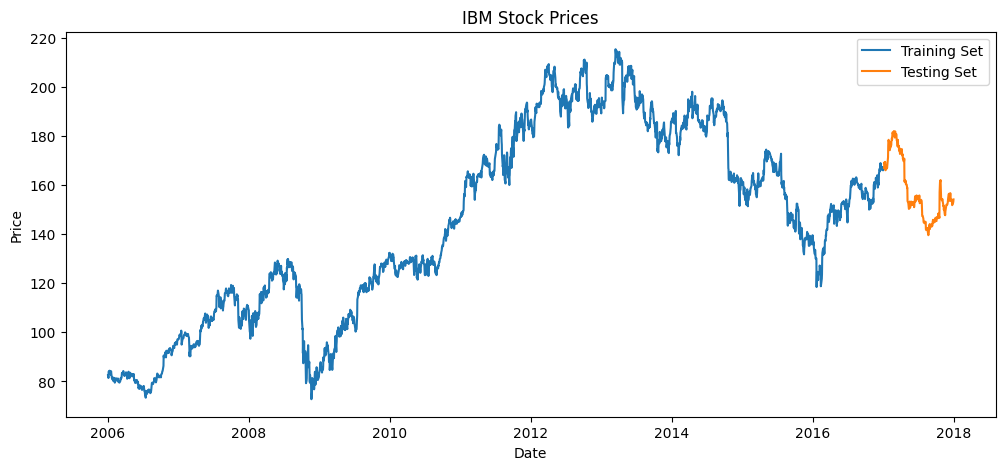

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scale the training and testing data
scaled_train_df = scaler.fit_transform(train_df)
scaled_test_df = scaler.transform(test_df)

# Inverse-transform the scaled data to get the original prices
inverse_scaled_train_df = scaler.inverse_transform(scaled_train_df)
inverse_scaled_test_df = scaler.inverse_transform(scaled_test_df)

# Plot the time series data
plt.figure(figsize=(12, 5))
plt.plot(train_df.index, inverse_scaled_train_df[:, 0], label='Training Set')
plt.plot(test_df.index, inverse_scaled_test_df[:, 0], label='Testing Set')
plt.title('IBM Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### **Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.**

In [ ]:
# Extract the 'Close' column for scaling
import numpy as np
from sklearn.preprocessing import MinMaxScaler

training_set = train_df['Close'].values.reshape(-1, 1)
test_set = test_df['Close'].values.reshape(-1, 1)

# Scale the training set from 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)

**Analysis:**

- For scaling the dataset, I extracted the 'Close' column assuming that it is the closing price for this type of dataset. I have learned that the closing price for stock price datasets is considered a vital data for predicting the final price movements.

### **Create a data structure with 60 timesteps and 1 output**

In [ ]:
# Create a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

### **Reshape the X_train for efficient modeling**

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Length of training set:", len(training_set_scaled))

Shape of X_train: (2709, 60, 1)
Length of training set: 2769


(2709, 60, 1) (2709,)


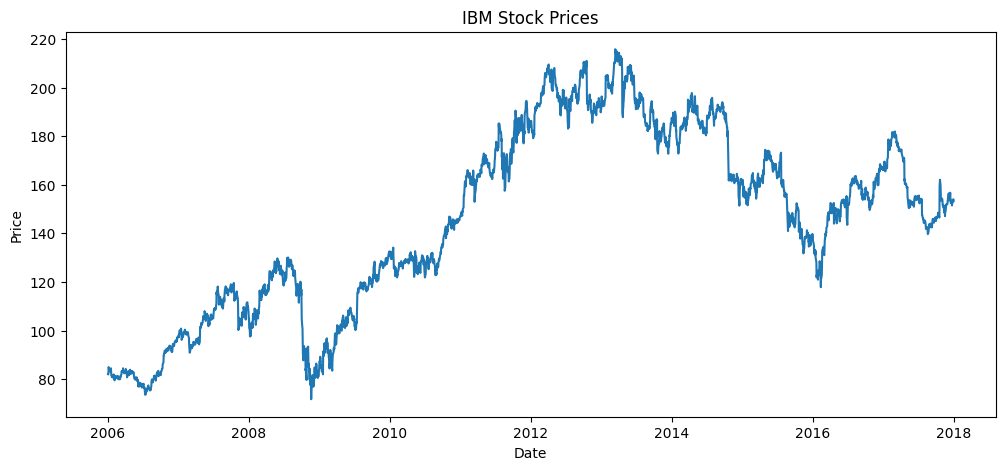

In [ ]:
print(X_train.shape, y_train.shape)

# Plot the time series data
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Close'])
plt.title('IBM Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

**Analysis:**

- Based on this graph, the IBM stock prices from 2006 to 2012-2014 have increased significantly. After 2014, the prices are decreasing once again.

## **Conclusion:**
- In doing this activity, I learned a new way on how data with dates can be manipulated and be displayed in graph form aside from the one I learned in Microsoft excel. In this activity also, I realized the sensitivity of the model and how it is important to pre process the data before training.